# UNSUPERVISED MACHINE LEARNING

In [8]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
# Load the iris dataset

iris_df = pd.read_csv("Iris.csv")
iris_df.drop("Id",axis=1,inplace=True)
iris_df.head() # See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Analysing the dataset

<IPython.core.display.Javascript object>


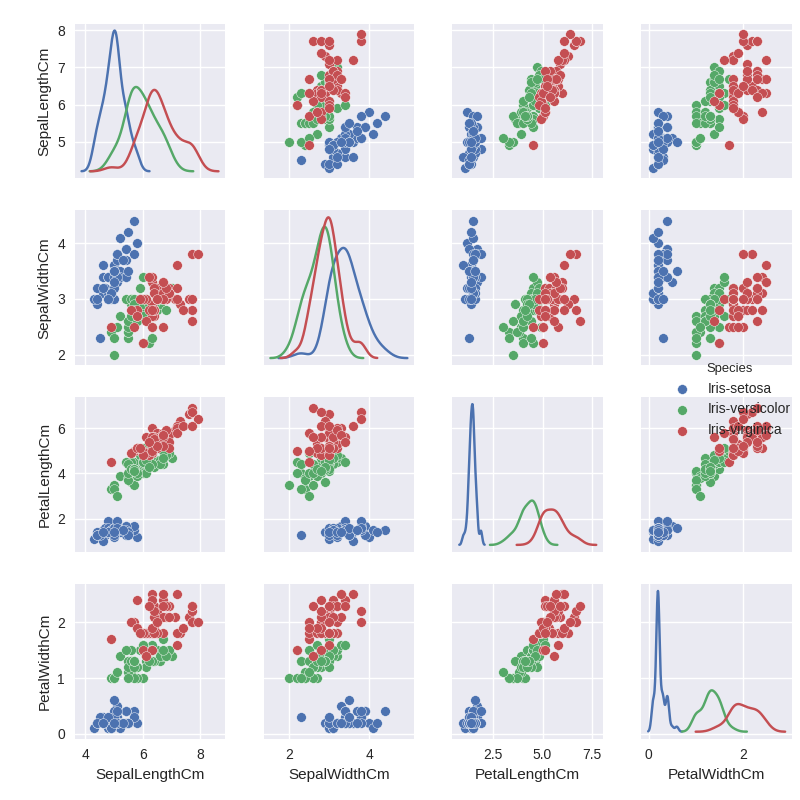

In [2]:
sn.pairplot(iris_df, hue='Species', diag_kind='kde',size=2);

# Elbow Method for optimal value of k in KMeans
There is a popular method known as elbow method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.

## Elbow method using inertia

<IPython.core.display.Javascript object>


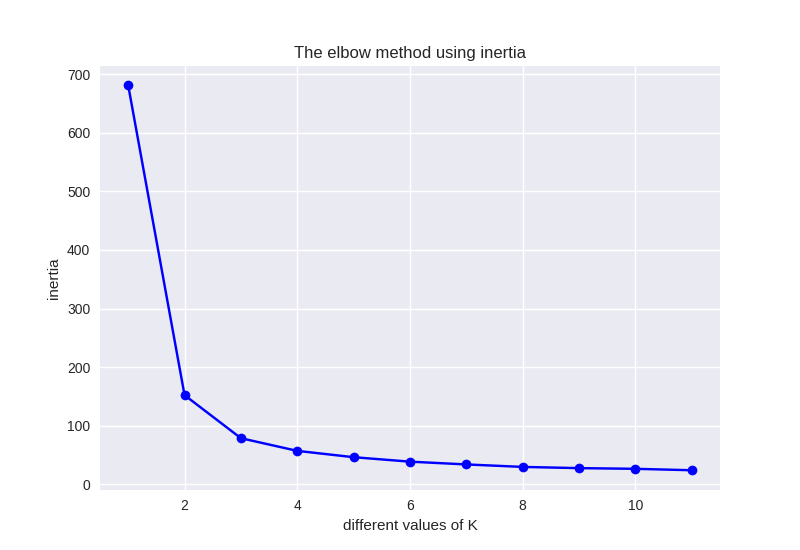

In [36]:

x = iris_df.iloc[:,0:4].values
distortions=[] #to store calculated average of the squared distances from the cluster centers of the respective clusters
inertia=[] # It is the sum of squared distances of samples to their closest cluster center
for i in range(1,12):
    kmeans = KMeans(n_clusters = i).fit(x)
    distortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0])
    
    inertia= inertia + [kmeans.inertia_] ##squared error
plt.figure()
plt.plot(range(1, 12), inertia,'bo-')
plt.title('The elbow method using inertia')
plt.xlabel('different values of K')
plt.ylabel('inertia') # Within cluster sum of squares
plt.show()
   

## Elbow method using distortion

<IPython.core.display.Javascript object>


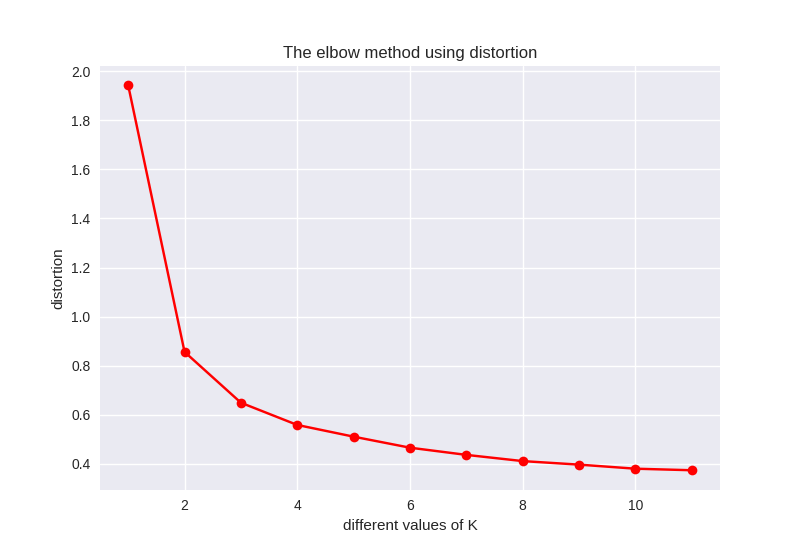

In [23]:
plt.figure()
plt.plot(range(1, 12), distortions,'ro-')
plt.title('The elbow method using distortion')
plt.xlabel('different values of K')
plt.ylabel('distortion') # Within cluster average of squares
plt.show()

# PLOT CLUSTERING FOR OPTIMAL VALUE OF K (3 here)
Analysing the elbow graph above we find that optimal value of K for k-mean clustering is 3

<IPython.core.display.Javascript object>


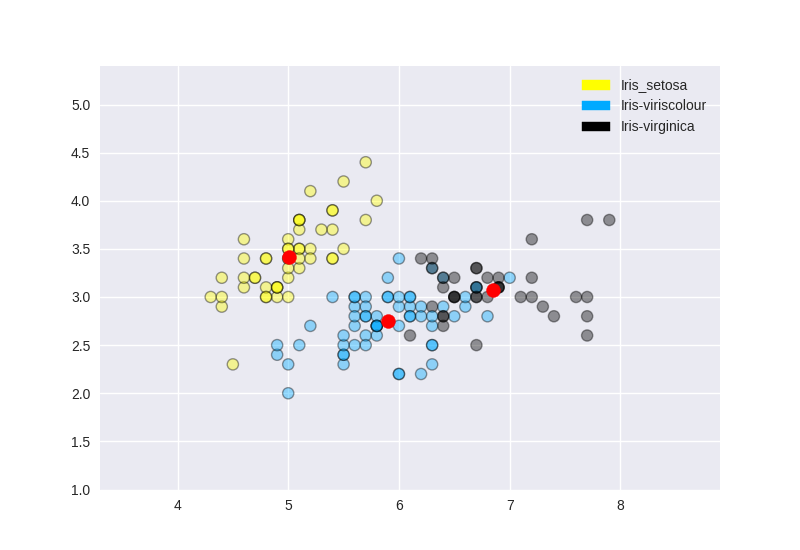

In [37]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
plot_labelled_scatter(x, kmeans.labels_, ['Iris_setosa','Iris-viriscolour','Iris-virginica'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids',marker='o')

# Plot clustering for different values of K

<IPython.core.display.Javascript object>


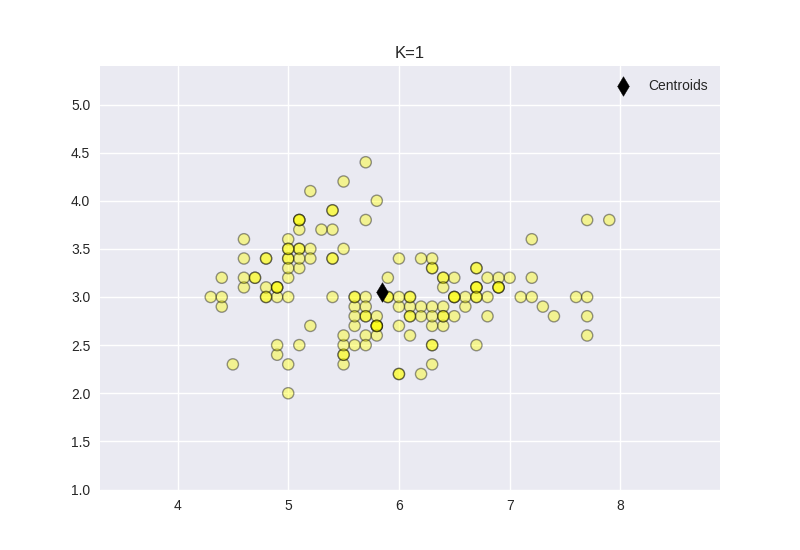

<IPython.core.display.Javascript object>


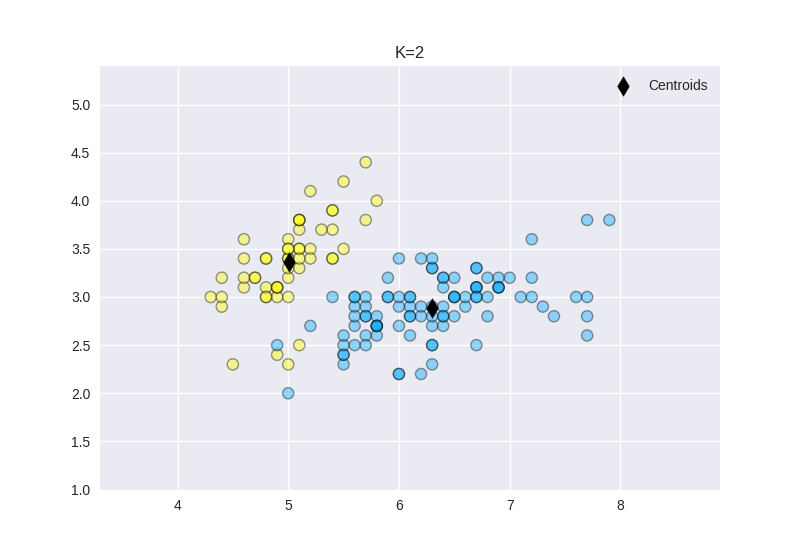

<IPython.core.display.Javascript object>


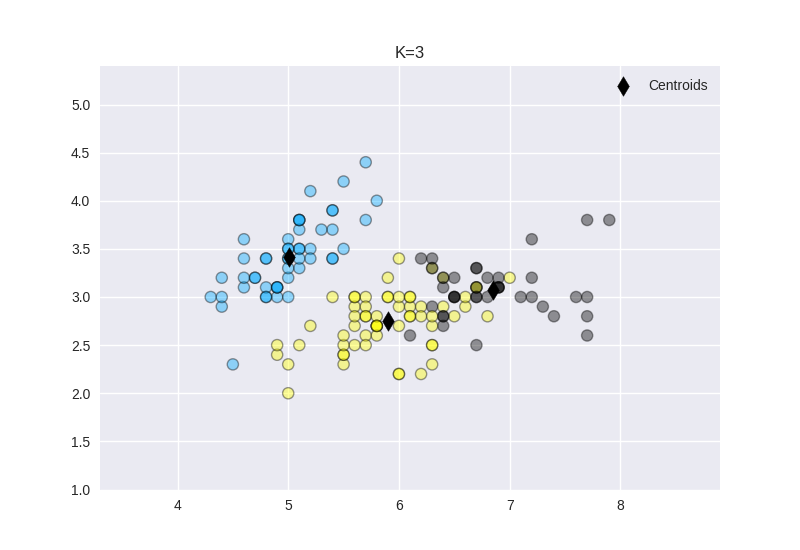

<IPython.core.display.Javascript object>


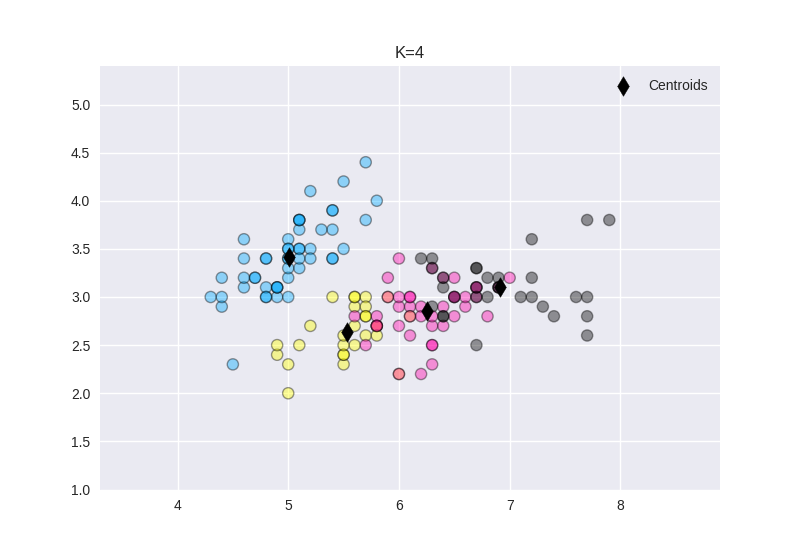

<IPython.core.display.Javascript object>


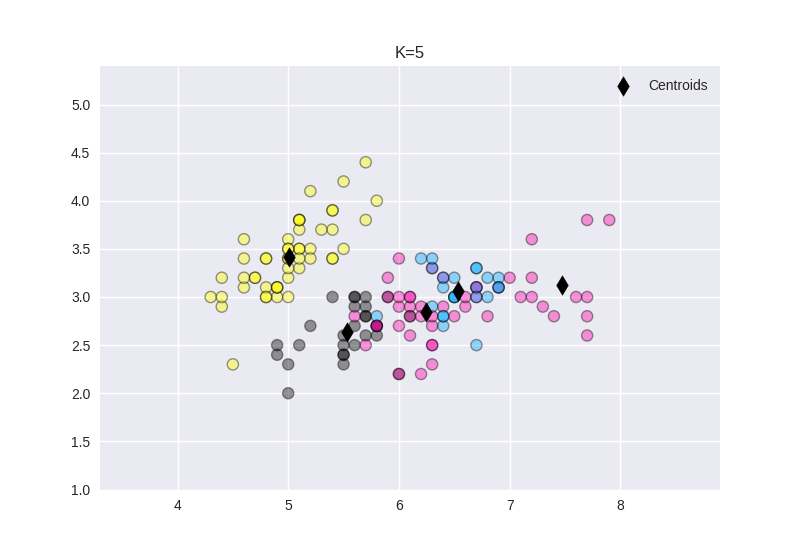

In [35]:
for i in range(1,6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(x)
    plot_labelled_scatter(x, kmeans.labels_, ['Iris_setosa','Iris-virginica','Iris-viriscolour'])
    # Plotting the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids',marker='d')
    plt.gca().set_title("K={}".format(i))
    plt.legend()